In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df=pd.read_csv(r"C:\Users\VANSHIKA  JAIN\Downloads\advertising.csv")

In [6]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [7]:
#we have to find relation between tv and sales
df.info()#to individualize

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe() #create summary

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


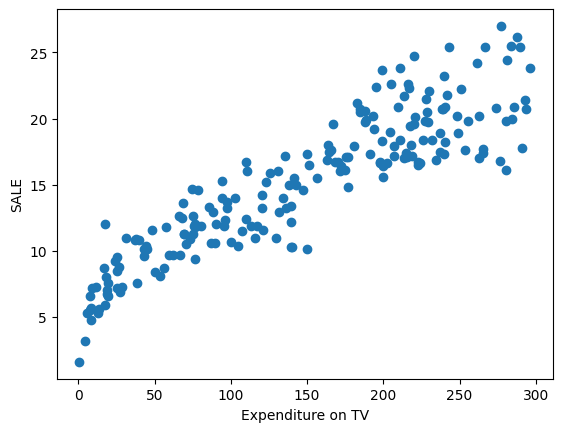

In [9]:
# we are finding a function such that s=f(T,R,N)
fig=plt.figure()
plt.scatter(df['TV'],df['Sales']) #tv on x against sales
plt.xlabel('Expenditure on TV') #x axis
plt.ylabel('SALE')# y axis
plt.show()
#this shows positive linear relation

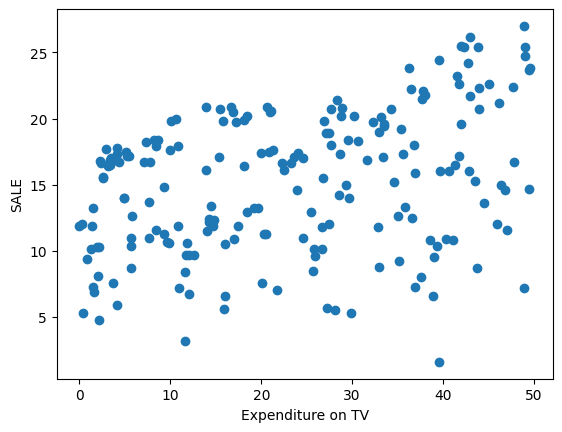

In [10]:
#using radio instead of tv
fig=plt.figure()
plt.scatter(df['Radio'],df['Sales']) #tv on x against sales
plt.xlabel('Expenditure on Radio') #x axis
plt.ylabel('SALE')# y axis
plt.show()
#

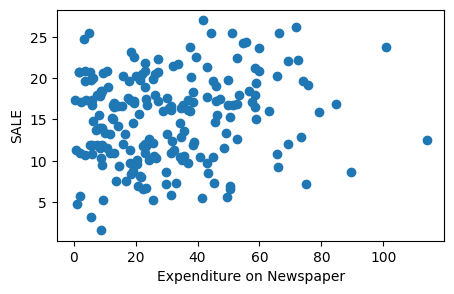

In [14]:
#use newspaper against sales
fig=plt.figure(figsize=(5,3))
plt.scatter(df['Newspaper'],df['Sales']) #tv on x against sales
plt.xlabel('Expenditure on Newspaper') #x axis
plt.ylabel('SALE')# y axis
plt.show()

In [98]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df[['TV']],df['Sales'], test_size=0.2,random_state=42)
#reason for 2 brackets to give 2D but output should be 1D


In [99]:
x_train

,TV
79,116.0
197,177.0
38,43.1
24,62.3
122,224.0
...,...
106,25.0
14,204.1
92,217.7
179,165.6


In [100]:
x_test.shape
y_train

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 160, dtype: float64

In [101]:
model=LinearRegression()

In [102]:
#train the model
model.fit(x_train , y_train)

LinearRegression()

In [103]:
model.coef_

array([0.05548294])

In [104]:
model.intercept_

7.007108428241848

In [105]:
#Sale=0.055(TV) + 7.007
model.predict([[11]])

C:\Users\VANSHIKA  JAIN\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.61742081])

In [106]:
#now pass actual value to evaluate model
model.predict([[116]])

C:\Users\VANSHIKA  JAIN\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.44312992])

In [107]:
#the predict is greater than actual value i.e 11 calc the percentage
pred=model.predict(x_test)

In [108]:
pred

array([16.06747317, 17.84847567, 23.25806271,  7.65625887, 19.23000098,
       11.17387752, 19.03581067,  9.78125562, 19.34651516, 16.72217191,
        8.75482116, 10.12524988, 20.01785878,  7.30671633, 14.74697911,
       16.45030549,  7.41213392, 17.97053815, 11.18497411, 20.17875932,
       19.74044406, 10.76885203,  9.1154603 , 20.92777906, 10.83543156,
        9.97544593, 18.85271696, 14.73588252, 11.84522114,  7.47316516,
       18.09260063, 10.84652815, 18.04266598,  7.94477018, 22.58117079,
       20.22314567,  9.68693462, 22.19279018, 13.50970946,  8.53288939])

In [109]:
res=pd.DataFrame()

In [118]:
res['error']= (res['Actual Sales'] - res['Predicted Sales'])**2

In [119]:
res.head()

,Expense(TV),Actual Sales,Predicted Sales,error
95,163.3,16.9,16.067473,0.693101
15,195.4,22.4,17.848476,20.716374
30,292.9,21.4,23.258063,3.452397
158,11.7,7.3,7.656259,0.126920
128,220.3,24.7,19.230001,29.920889


In [120]:
#through this we can see that it is working okay just slightly diff
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
mse= mean_squared_error(y_test,pred)

mse

In [121]:
mse

6.101072906773963

In [122]:
#eg of multiple regression
x_train,x_test,y_train,y_test=train_test_split(df[['TV','Radio']],df['Sales'], test_size=0.2,random_state=42)

In [123]:
x_train

,TV,Radio
79,116.0,7.7
197,177.0,9.3
38,43.1,26.7
24,62.3,12.6
122,224.0,2.4
...,...,...
106,25.0,11.0
14,204.1,32.9
92,217.7,33.5
179,165.6,10.0


In [124]:
mlr=LinearRegression()

In [125]:
mlr.fit(x_train,y_train)

LinearRegression()

In [126]:
mlr.coef_

array([0.05450736, 0.10325764])

In [127]:
mlr.intercept_

4.791381661776025

In [136]:
#model has became 0.05(Tv)+0.103(Radio)+4.719
pre=mlr.predict(x_test)

In [137]:
pre

array([16.95537518, 20.36750946, 23.67877906,  9.23932462, 21.8589777 ,
       12.49890184, 21.14158798,  8.71453835, 17.26489488, 16.65891755,
        9.04850144,  8.44326393, 17.92443396,  8.17312478, 12.61199966,
       14.8739442 ,  8.09082502, 17.9679393 , 10.99191604, 20.57101437,
       20.63604288, 12.26621032, 11.0239442 , 22.2361825 ,  9.51268565,
        7.91404079, 20.86878181, 13.8814929 , 10.76286373,  8.05785124,
       15.9504224 , 10.68007267, 20.73382321, 10.22491484, 21.52687927,
       21.3167722 , 12.2771962 , 22.6941923 , 12.69753173,  6.45554633])

In [130]:
res_mlr=pd.DataFrame()

In [138]:
res_mlr['Predicted sales']=pre

ValueError: Length of values (40) does not match length of index (160)

In [139]:
res_mlr

,Tv,Radio,TV,Actual sales
79,116.0,NaN,NaN,NaN
197,177.0,NaN,NaN,NaN
38,43.1,NaN,NaN,NaN
24,62.3,NaN,NaN,NaN
122,224.0,NaN,NaN,NaN
...,...,...,...,...
106,25.0,NaN,NaN,NaN
14,204.1,NaN,NaN,NaN
92,217.7,NaN,NaN,NaN
179,165.6,NaN,NaN,NaN
